In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/kaggle/input/housing-prices-in-mumbai/Mumbai1.csv')

In [3]:
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [4]:
df.tail()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6346,6346,2750000,700,Badlapur East,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1


In [5]:
df.sample(3)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
6064,6064,3326000,348,Virar,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0
1058,1058,3310000,780,Kasheli,2,1,0,1,1,0,1,1,0,0,1,0,0,0,0
1157,1157,13000000,650,Chembur,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0


In [6]:
df.shape

(6347, 19)

In [7]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [9]:
df.describe()

,Unnamed: 0,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
count,6347.000000,6.347000e+03,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000,6347.000000
mean,3173.000000,1.515401e+07,1004.327084,1.910036,0.341736,0.581377,0.801481,0.562943,0.281393,0.562943,0.559319,0.496297,0.484796,0.360643,0.219631,0.243107,0.381440,0.458327
std,1832.365411,2.015943e+07,556.375703,0.863304,0.474329,0.493372,0.398916,0.496061,0.449714,0.496061,0.496508,0.500026,0.499808,0.480225,0.414029,0.428993,0.485778,0.498300
min,0.000000,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1586.500000,5.300000e+06,650.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3173.000000,9.500000e+06,905.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4759.500000,1.750000e+07,1182.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,6346.000000,4.200000e+08,8511.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['Price'].describe()

count    6.347000e+03
mean     1.515401e+07
std      2.015943e+07
min      2.000000e+06
25%      5.300000e+06
50%      9.500000e+06
75%      1.750000e+07
max      4.200000e+08
Name: Price, dtype: float64

In [11]:
df.iloc[df['Price'].idxmax()]

Unnamed: 0                            1687
Price                            420000000
Area                                  8511
Location                Worli South Mumbai
No. of Bedrooms                          5
New/Resale                               0
Gymnasium                                0
Lift Available                           1
Car Parking                              1
Maintenance Staff                        1
24x7 Security                            0
Children's Play Area                     0
Clubhouse                                0
Intercom                                 0
Landscaped Gardens                       1
Indoor Games                             0
Gas Connection                           0
Jogging Track                            0
Swimming Pool                            0
Name: 1687, dtype: object

In [12]:
df.iloc[df['Price'].idxmin()]

Unnamed: 0                     192
Price                      2000000
Area                           420
Location                Virar East
No. of Bedrooms                  1
New/Resale                       1
Gymnasium                        0
Lift Available                   0
Car Parking                      0
Maintenance Staff                0
24x7 Security                    0
Children's Play Area             0
Clubhouse                        0
Intercom                         0
Landscaped Gardens               0
Indoor Games                     0
Gas Connection                   0
Jogging Track                    0
Swimming Pool                    0
Name: 192, dtype: object

In [13]:
df['Area'].describe()

count    6347.000000
mean     1004.327084
std       556.375703
min       200.000000
25%       650.000000
50%       905.000000
75%      1182.000000
max      8511.000000
Name: Area, dtype: float64

In [14]:
df[df['No. of Bedrooms'] == df['No. of Bedrooms'].max()]

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
1592,1592,25000000,2500,Sea Face,7,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1600,1600,120000000,3500,Upper Worli,7,0,0,1,1,1,0,0,0,0,1,0,0,0,0


In [15]:
df['Location'].value_counts()

Kharghar             533
Thane West           418
Mira Road East       390
Ulwe                 319
Borivali West        176
                    ... 
worli sea face         1
Sea Face               1
Shiv Sagar Estate      1
Natakwala Lane         1
Padle Gaon             1
Name: Location, Length: 413, dtype: int64

In [16]:
px.bar(df['Location'].value_counts().head(20), color_continuous_scale='purpor', color=df['Location'].value_counts().head(20))

In [17]:
df['No. of Bedrooms'].value_counts()

2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: No. of Bedrooms, dtype: int64

In [18]:
px.bar(df['No. of Bedrooms'].value_counts())

In [19]:
px.scatter(data_frame=df, x='Price', y='Area')

In [20]:
px.histogram(data_frame=df, x='Price')

In [21]:
px.histogram(data_frame=df, x='No. of Bedrooms')

In [22]:
px.scatter(data_frame=df, x='Price', y='No. of Bedrooms')

In [23]:
px.histogram(data_frame=df, x='Area')

In [24]:
px.histogram(data_frame=df, x='Location')

In [25]:
px.box(data_frame=df, x='Location', y='Price')

In [26]:
px.box(data_frame=df, x='Location', y='Area')

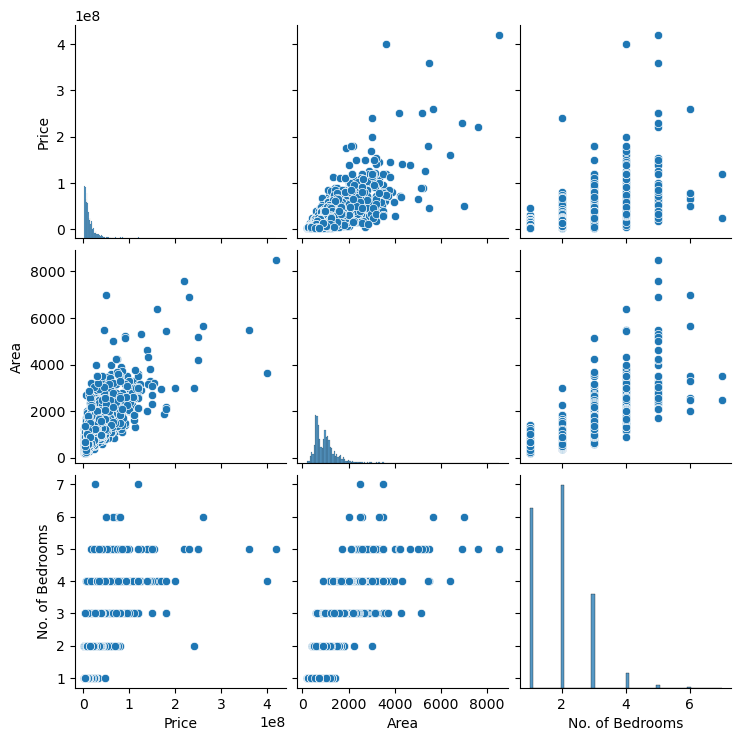

In [27]:
sns.pairplot(df[['Price', 'Area', 'No. of Bedrooms']])

/tmp/ipykernel_20/2246584189.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

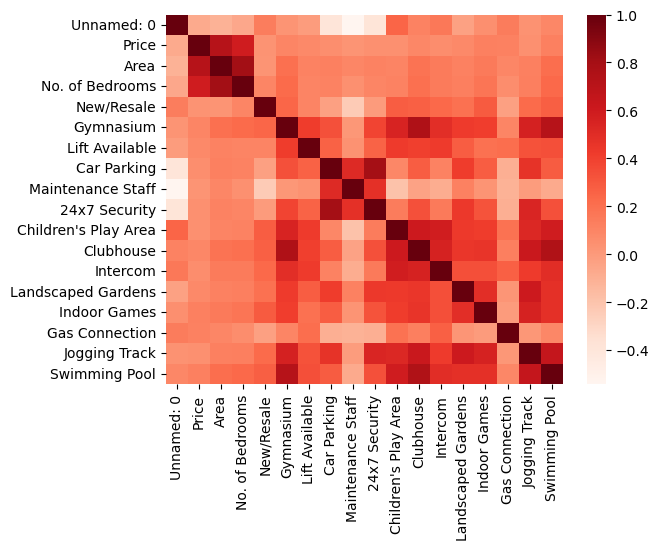

In [28]:
sns.heatmap(df.corr(), cmap='Reds')

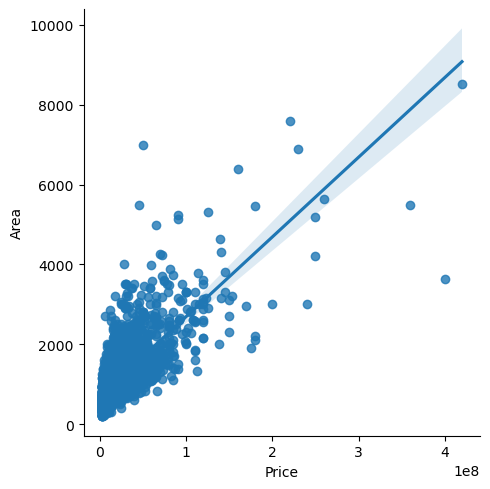

In [29]:
sns.lmplot(data=df,x='Price', y='Area')

In [30]:
X = df[['Area', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', "Children's Play Area",
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool']]
y = df['Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
lm_predictions = lm_model.predict(X_test)
print(f'MAE: {metrics.mean_absolute_error(y_test, lm_predictions)}\nMSE: {metrics.mean_squared_error(y_test, lm_predictions)}\nRMSE: {np.sqrt(metrics.mean_squared_error(y_test, lm_predictions))}')

MAE: 7829910.04142862
MSE: 240325645535661.16
RMSE: 15502439.986520223


In [33]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)
print(f'MAE: {metrics.mean_absolute_error(y_test, dtree_predictions)}\nMSE: {metrics.mean_squared_error(y_test, dtree_predictions)}\nRMSE: {np.sqrt(metrics.mean_squared_error(y_test, dtree_predictions))}')

MAE: 7881851.26588665
MSE: 282738045335524.75
RMSE: 16814816.244476914


In [34]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
print(f'MAE: {metrics.mean_absolute_error(y_test, rfc_predictions)}\nMSE: {metrics.mean_squared_error(y_test, rfc_predictions)}\nRMSE: {np.sqrt(metrics.mean_squared_error(y_test, rfc_predictions))}')

MAE: 6704110.065085374
MSE: 220857899702650.44
RMSE: 14861288.628603188
